# Intro

**Every minute**, the spider moves at an angle taken at random **uniformly between 0 and 360degrees**, at a distance taken at random **uniformly between 0 and 2m**.

The spider starts at coordinates (0, 0) and my place can be represented by the area determined by the square delimited by upper-left corner (10, 10) and lower-right corner (15, 6) (unit is meter)

What's the probability the spider is at my place after 240mn?

# Solve

In [17]:
import numpy as np
import math

N_MINUTES = 240

UPPER_LEFT_CORNER = (10, 10)
LOWER_RIGHT_CORNER = (15, 6)


def movement():
  magnitude = np.random.uniform()*2
  angle = np.random.uniform()*360
  x_movement = math.cos(math.radians(angle))*magnitude
  y_movement = math.sin(math.radians(angle))*magnitude
  return (x_movement,y_movement)

def spider_movement(minutes):
  x,y = 0,0
  for _ in range(minutes):
    x_move,y_move = movement()
    x += x_move
    y += y_move
  return (x,y)

def is_the_spider_home(UPPER_LEFT_CORNER,LOWER_RIGHT_CORNER,spider_coordinates):
  if spider_coordinates[0] >= UPPER_LEFT_CORNER[0] and spider_coordinates[0] <= LOWER_RIGHT_CORNER[0]:
    if spider_coordinates[1] >= LOWER_RIGHT_CORNER[1] and spider_coordinates[1] <= UPPER_LEFT_CORNER[1]:
      return True
  return False

def get_results(up_left_corner, low_right_corner, minutes, spiders):
  spiders_at_home = 0
  for _ in range(spiders):
    if is_the_spider_home(up_left_corner,low_right_corner,spider_movement(minutes)):
      spiders_at_home += 1

  return spiders_at_home/spiders

get_results(UPPER_LEFT_CORNER,LOWER_RIGHT_CORNER,240,100000)



KeyboardInterrupt: 

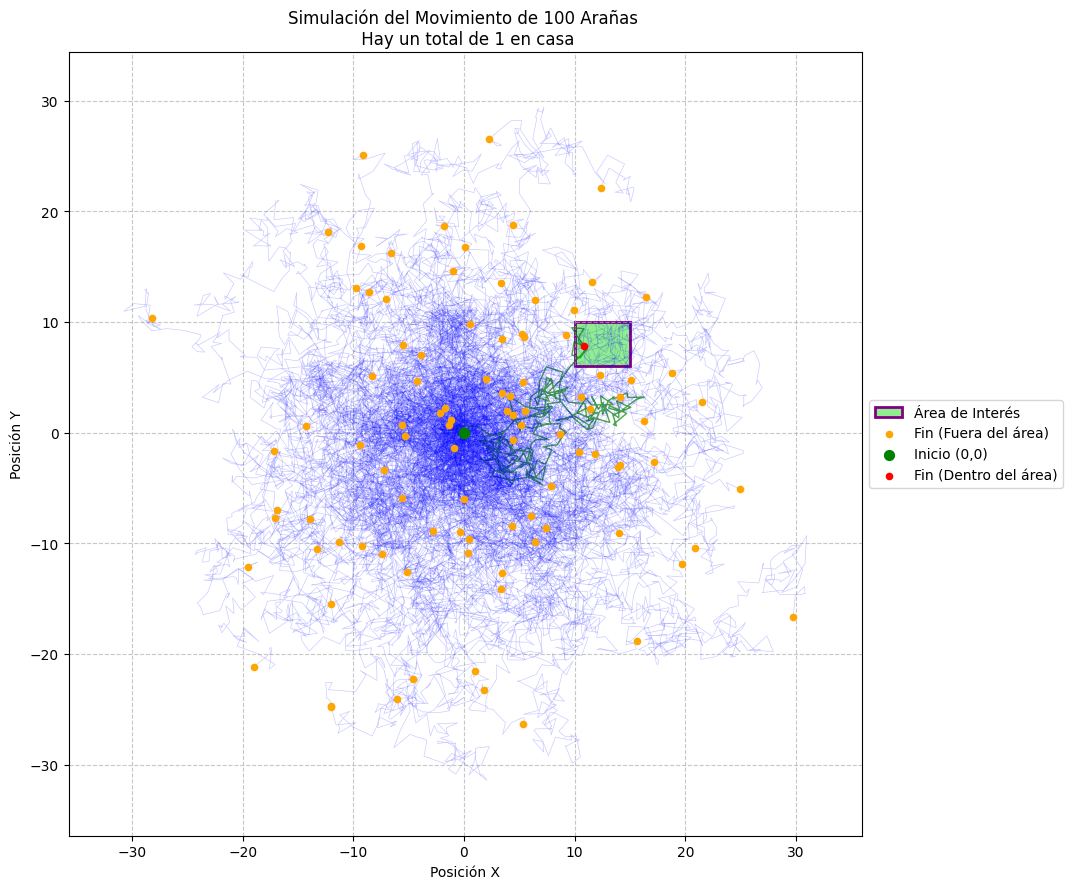

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches # Para dibujar el rectángulo

N_MINUTES = 240

UPPER_LEFT_CORNER = (10, 10)
LOWER_RIGHT_CORNER = (15, 6)


def movement():
  magnitude = np.random.uniform()*2
  angle = np.random.uniform()*360
  x_movement = math.cos(math.radians(angle))*magnitude
  y_movement = math.sin(math.radians(angle))*magnitude
  return (x_movement,y_movement)

def is_the_spider_home(UPPER_LEFT_CORNER,LOWER_RIGHT_CORNER,spider_coordinates):
  if spider_coordinates[0] >= UPPER_LEFT_CORNER[0] and spider_coordinates[0] <= LOWER_RIGHT_CORNER[0]:
    if spider_coordinates[1] >= LOWER_RIGHT_CORNER[1] and spider_coordinates[1] <= UPPER_LEFT_CORNER[1]:
      return True
  return False

def spider_movement(UPPER_LEFT_CORNER,LOWER_RIGHT_CORNER,minutes):
  x_moves = [0]
  y_moves = [0]
  x,y = 0,0
  for _ in range(minutes):
    x_move,y_move = movement()
    x += x_move
    y += y_move
    x_moves.append(x)
    y_moves.append(y)
  the_spider_is_home = is_the_spider_home(UPPER_LEFT_CORNER,LOWER_RIGHT_CORNER,(x,y))
  return (x_moves,y_moves,the_spider_is_home)

def get_results(up_left_corner, low_right_corner, minutes, spiders):
  fig, ax = plt.subplots(figsize=(12, 9))

  rect_x = UPPER_LEFT_CORNER[0]
  rect_y = LOWER_RIGHT_CORNER[1]
  rect_width = LOWER_RIGHT_CORNER[0] - UPPER_LEFT_CORNER[0]
  rect_height = UPPER_LEFT_CORNER[1] - LOWER_RIGHT_CORNER[1]

  rect = patches.Rectangle((rect_x, rect_y), rect_width, rect_height,
                           linewidth=2, edgecolor='purple', facecolor='lightgreen', alpha=1, label='Área de Interés')
  ax.add_patch(rect)

  # Para asegurar que la leyenda solo muestre una entrada para "Inicio" y "Fin"
  plotted_start = False
  plotted_end_in = False
  plotted_end_out = False

  all_x_coords = []
  all_y_coords = []

  spiders_home = 0
  for i in range(spiders):
      x_coords, y_coords,is_at_home = spider_movement(up_left_corner, low_right_corner,minutes)

      # Recopilamos todas las coordenadas para ajustar los límites del gráfico al final
      all_x_coords.extend(x_coords)
      all_y_coords.extend(y_coords)

      # Dibujar la trayectoria de la araña (línea tenue)

      # Marcar la posición final (puntos más pequeños)
      final_x, final_y = x_coords[-1], y_coords[-1]

      # Solo añadir a la leyenda una vez
      if is_at_home:
        spiders_home += 1
        ax.plot(x_coords, y_coords, color='green', linestyle='-', linewidth=1, alpha=0.5) # Línea más delgada y transparente
        if not plotted_end_in:
          ax.scatter(final_x, final_y, color='red', s=10, zorder=5, label='Fin (Dentro del área)') # s=30 para tamaño más pequeño
          plotted_end_in = True
        else:
          ax.scatter(final_x, final_y, color='red', s=10, zorder=5)
      else:
        ax.plot(x_coords, y_coords, color='blue', linestyle='-', linewidth=0.5, alpha=0.05) # Línea más delgada y transparente
        if not plotted_end_out:
          ax.scatter(final_x, final_y, color='orange', s=10, zorder=5, label='Fin (Fuera del área)')
          plotted_end_out = True
        else:
          ax.scatter(final_x, final_y, color='orange', s=10, zorder=5)

      # Marcar el punto de inicio (0,0) solo una vez para la leyenda
      if not plotted_start:
        ax.scatter(x_coords[0], y_coords[0], color='green', s=50, zorder=5, label='Inicio (0,0)') # s=50 para tamaño más pequeño
        plotted_start = True
      elif i == spiders - 1: # Asegura que si no se plotea antes, se haga al menos una vez al final
          ax.scatter(x_coords[0], y_coords[0], color='green', s=50, zorder=5)

  # Ajustes visuales
  ax.set_title(f'Simulación del Movimiento de {spiders} Arañas \n Hay un total de {spiders_home} en casa')
  ax.set_xlabel('Posición X')
  ax.set_ylabel('Posición Y')
  ax.grid(True, linestyle='--', alpha=0.7)

  # Mover la leyenda fuera del gráfico
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium') # Mueve la leyenda a la derecha

  ax.set_aspect('equal', adjustable='box') # Para que las unidades en X y Y tengan el mismo tamaño

  # Ajustar límites para asegurar que se vea todo el recorrido y el área
  # Considerar todas las coordenadas generadas
  min_x_val = min(min(all_x_coords), rect_x) - 5 # Un poco más de margen
  max_x_val = max(max(all_x_coords), rect_x + rect_width) + 5
  min_y_val = min(min(all_y_coords), rect_y) - 5
  max_y_val = max(max(all_y_coords), rect_y + rect_height) + 5

  ax.set_xlim(min_x_val, max_x_val)
  ax.set_ylim(min_y_val, max_y_val)

  # Asegurarse de que el layout se ajuste para la leyenda
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta el espacio para la leyenda a la derecha

  plt.show()



get_results(UPPER_LEFT_CORNER, LOWER_RIGHT_CORNER, N_MINUTES,10000)